In [48]:
import zipfile
import numpy as np
import pandas as pd

import warnings
warnings.warn("ignore")

/var/folders/c0/83yx0xpx6y39p9rt9s83rg5r0000gn/T/ipykernel_3656/1688726422.py:6: UserWarning: ignore
  warnings.warn("ignore")


### First dataset

In [49]:
# the path to the zip file
zip_file_path = '../data/raw/ml-100k.zip'

# the destination directory for extracting the contents
extracted_dir = '../data/raw/'

# unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

In [50]:
# read the csv file
csv_file_path = extracted_dir + 'ml-100k/u.data'
ratings = pd.read_csv(csv_file_path, delimiter='\t', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'])
# display the first few rows of the DataFrame
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [51]:
print('there are no nan values in dataset' if ratings.shape == ratings.dropna().shape else 'there are nan values in dataset')

there are no nan values in dataset


### Second dataset

In [52]:
genres = ['unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western']
movies = pd.read_csv(extracted_dir + 'ml-100k/u.item', sep='|', encoding='latin-1')
movies.columns = ['item_id', 'title', 'date', 'release_date', 'url'] + genres
movies = movies.drop(columns=['title', 'release_date', 'url']) # not needed for training process
movies = movies.dropna() # drop rows with missing values

In [53]:
movies.head()

,item_id,date,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,2,01-Jan-1995,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,01-Jan-1995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,01-Jan-1995,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,01-Jan-1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,6,01-Jan-1995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# convert the 'date' column to datetime
movies['date'] = pd.to_datetime(movies['date'], format='%d-%b-%Y')
# extract the year and month and replace the 'date' column with it
movies['year'] = movies['date'].dt.year
movies['year'] = movies['year'].astype('int')

movies['month'] = movies['date'].dt.month
movies['month'] = movies['month'].astype('int')
movies = movies.drop(columns=['date']) # not needed for training process

movies.head()

,item_id,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,year,month
0,2,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995,1
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995,1
2,4,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1995,1
3,5,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1995,1
4,6,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1995,1


### Third dataset

In [55]:
users = pd.read_csv('../data/raw/ml-100k/u.user', sep='|', names=['user_id', 'age', 'sex', 'occupation', 'zip_code'], encoding='latin-1', parse_dates=True)
users = users.drop(columns=['zip_code']) # not needed for training process
users.head()

,user_id,age,sex,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [56]:
print('there are no nan values in dataset' if ratings.shape == ratings.dropna().shape else 'there are nan values in dataset')

there are no nan values in dataset


In [57]:
users['sex'] = users['sex'].replace({'M': 1, 'F': 0})
users.head()

,user_id,age,sex,occupation
0,1,24,1,technician
1,2,53,0,other
2,3,23,1,writer
3,4,24,1,technician
4,5,33,0,other


In [58]:
users['occupation'].unique()

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

In [59]:
users = pd.get_dummies(users, columns=['occupation'], prefix='occupation')

In [60]:
users.head()

,user_id,age,sex,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,24,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,53,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,23,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,24,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,33,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Let's explore and vizaulize `ratings` dataset

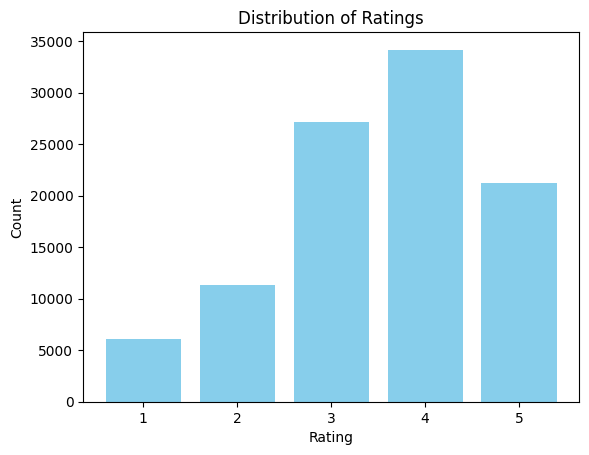

In [14]:
import matplotlib.pyplot as plt

rating_counts = ratings['rating'].value_counts().sort_index()

plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

Let's remove films with less than 5 ratings

In [61]:
ratings = ratings.groupby('item_id').filter(lambda x: len(x) >= 5)

### Let's explore and vizaulize `movies` dataset

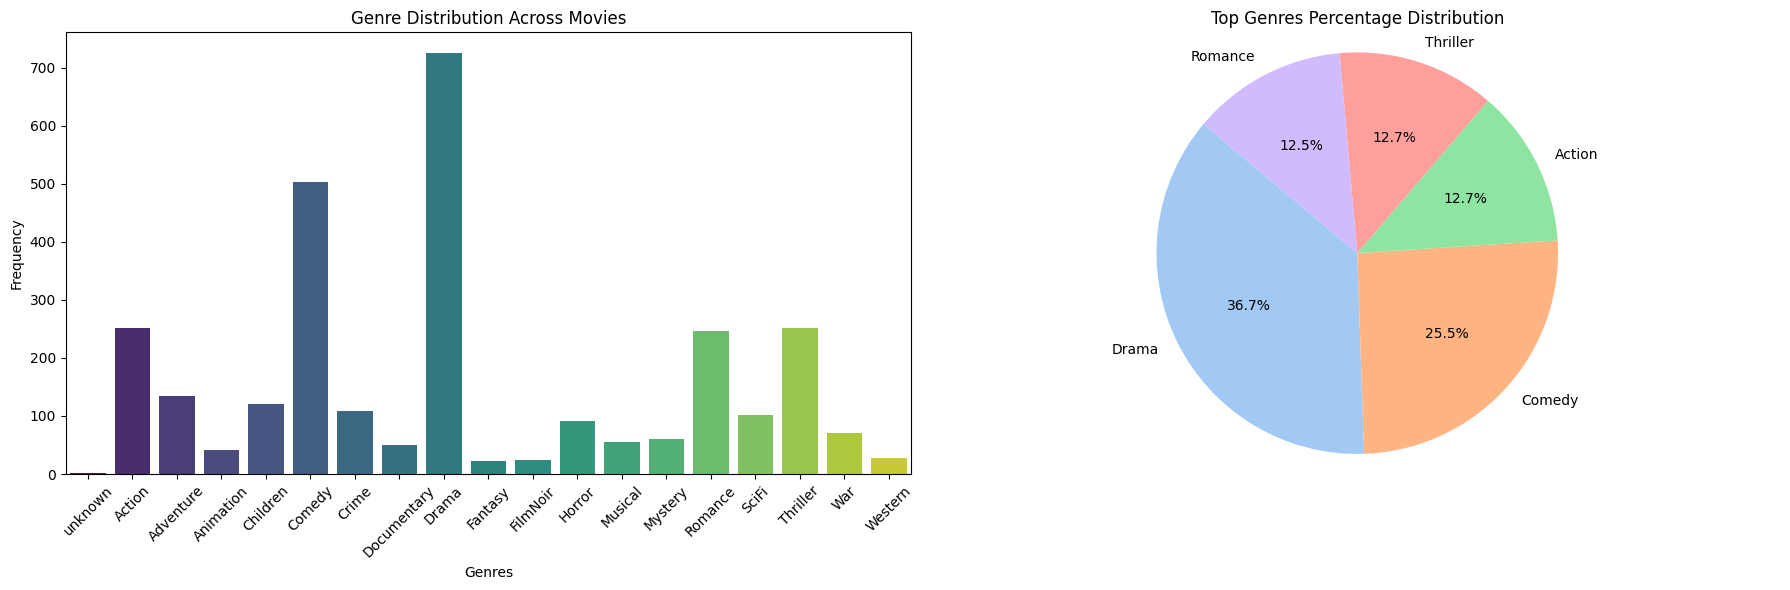

In [62]:
import seaborn as sns

genres_df = movies[genres]
genre_counts = genres_df.sum()
genre_percentages = genres_df.sum() / len(genres_df) * 100
top_genres = genre_percentages.sort_values(ascending=False).head(5) # sort genres based on percentages and select the top ones

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis", ax=axes[0])
axes[0].set_title('Genre Distribution Across Movies')
axes[0].set_xlabel('Genres')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)
axes[1].pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[1].set_title('Top Genres Percentage Distribution')
axes[1].axis('equal')
plt.tight_layout()
plt.show()

Let's remove films with `unknown` genre

In [63]:
movies = movies.drop(columns=['unknown'])

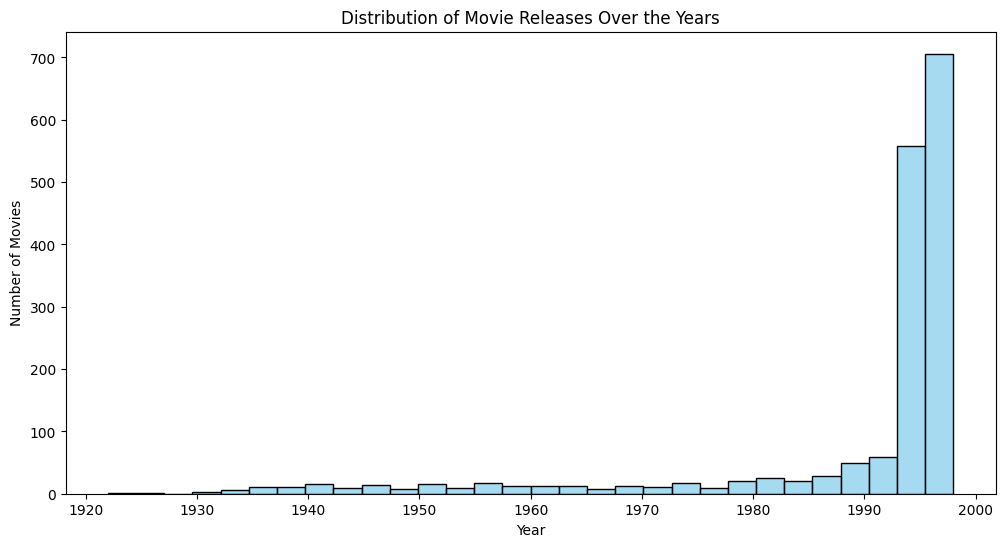

In [64]:
plt.figure(figsize=(12, 6))
sns.histplot(movies['year'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Movie Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

In [65]:
movies[movies['year'] < 1930]

,item_id,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,year,month
673,675,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1922,1
1540,1542,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1926,1


Let's delete year < 1930

In [66]:
movies = movies[movies['year'] >= 1930]

### Let's explore and vizaulize `users` dataset

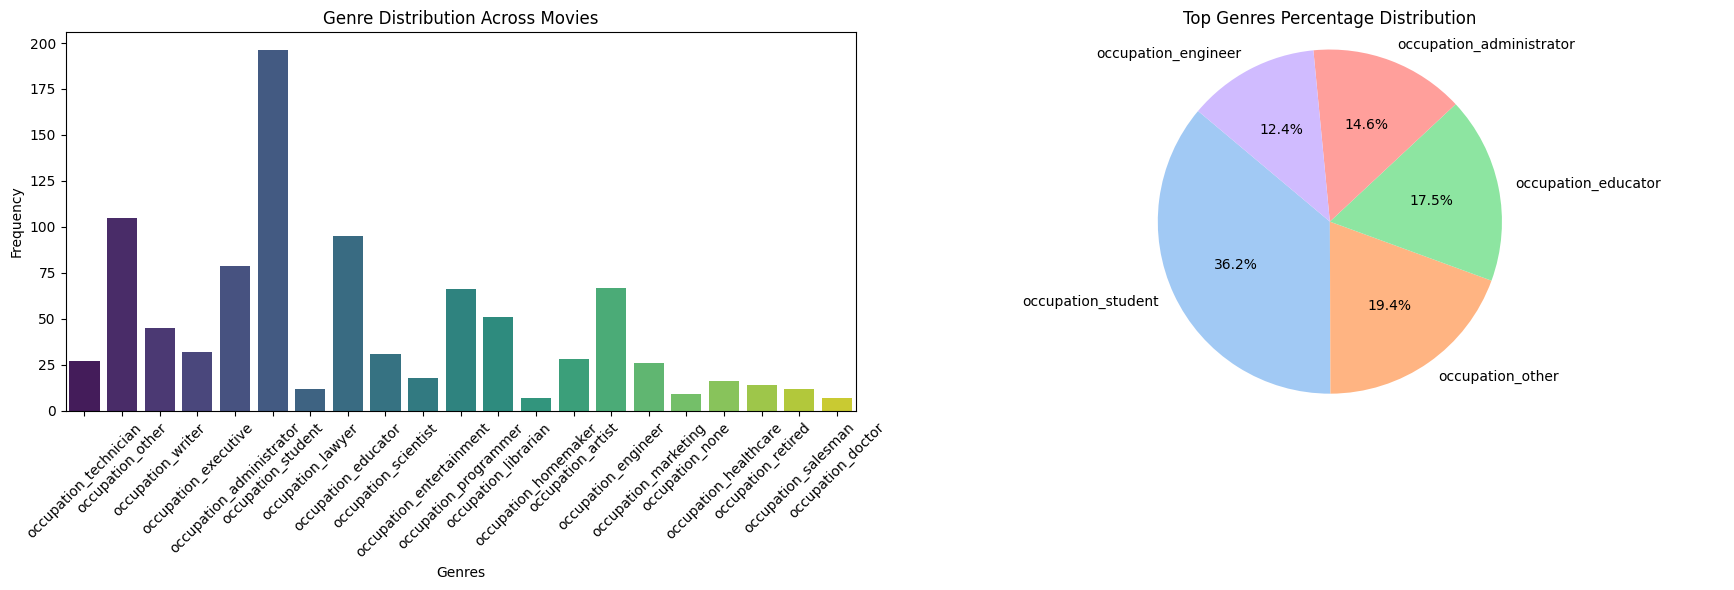

In [67]:
import seaborn as sns

occupations = ['occupation_technician', 'occupation_other', 'occupation_writer', 'occupation_executive', 'occupation_administrator',
               'occupation_student', 'occupation_lawyer', 'occupation_educator', 'occupation_scientist', 'occupation_entertainment',
               'occupation_programmer', 'occupation_librarian', 'occupation_homemaker', 'occupation_artist', 'occupation_engineer',
               'occupation_marketing', 'occupation_none', 'occupation_healthcare', 'occupation_retired', 'occupation_salesman', 'occupation_doctor']
occupations_df = users[occupations]
occupation_counts = occupations_df.sum()
occupation_percentages = occupations_df.sum() / len(occupations_df) * 100
top_occupations = occupation_percentages.sort_values(ascending=False).head(5) # sort occupations based on percentages and select the top ones

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette="viridis", ax=axes[0])
axes[0].set_title('Genre Distribution Across Movies')
axes[0].set_xlabel('Genres')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)
axes[1].pie(top_occupations, labels=top_occupations.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[1].set_title('Top Genres Percentage Distribution')
axes[1].axis('equal')
plt.tight_layout()
plt.show()

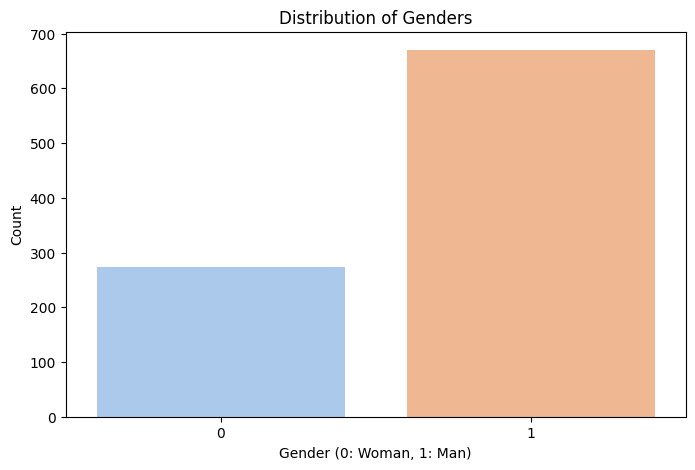

In [68]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', data=users, palette='pastel')
plt.title('Distribution of Genders')
plt.xlabel('Gender (0: Woman, 1: Man)')
plt.ylabel('Count')
plt.show()

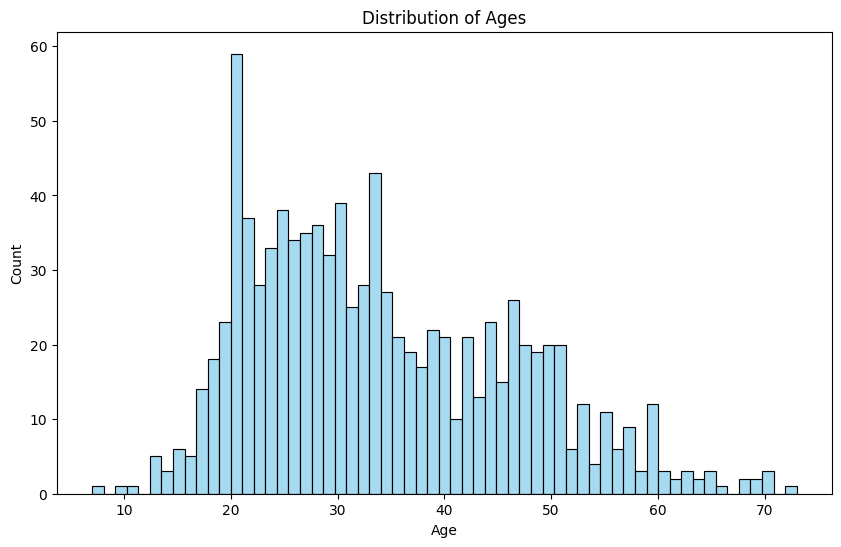

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(users['age'], bins=61, kde=False, color='skyblue')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [71]:
print("Adilts:", users[users['age'] < 18].shape[0])
print("Non adults:", users[users['age'] >= 18].shape[0])

Adilts: 36
Non adults: 907


there are not so many adults but i decided not to drop them

In [72]:
# merge ratings and movies on 'item_id'
dataset = pd.merge(ratings, movies, on='item_id')

# merge the result with users on 'user_id'
dataset = pd.merge(dataset, users, on='user_id')

# to avoid gradient explosion
dataset = dataset.drop(columns=['timestamp'])

In [77]:
dataset.columns

Index(['user_id', 'item_id', 'rating', 'timestamp', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'FilmNoir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'SciFi', 'Thriller', 'War', 'Western', 'year', 'month', 'age', 'sex',
       'occupation_administrator', 'occupation_artist', 'occupation_doctor',
       'occupation_educator', 'occupation_engineer',
       'occupation_entertainment', 'occupation_executive',
       'occupation_healthcare', 'occupation_homemaker', 'occupation_lawyer',
       'occupation_librarian', 'occupation_marketing', 'occupation_none',
       'occupation_other', 'occupation_programmer', 'occupation_retired',
       'occupation_salesman', 'occupation_scientist', 'occupation_student',
       'occupation_technician', 'occupation_writer'],
      dtype='object')

In [78]:
dataset.describe()

,user_id,item_id,rating,timestamp,Action,Adventure,Animation,Children,Comedy,Crime,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
count,98772.000000,98772.000000,98772.000000,9.877200e+04,98772.000000,98772.000000,98772.000000,98772.000000,98772.000000,98772.000000,...,98772.000000,98772.000000,98772.000000,98772.000000,98772.000000,98772.000000,98772.000000,98772.000000,98772.000000,98772.000000
mean,462.487112,420.645932,3.534615,8.835191e+08,0.258545,0.139098,0.031922,0.067975,0.295701,0.081096,...,0.019570,0.009011,0.106771,0.078129,0.015976,0.008596,0.020654,0.220346,0.035192,0.055461
std,266.642082,321.090577,1.122070,5.341572e+06,0.437837,0.346051,0.175793,0.251704,0.456360,0.272984,...,0.138519,0.094496,0.308824,0.268377,0.125384,0.092313,0.142223,0.414482,0.184266,0.228879
min,1.000000,2.000000,1.000000,8.747247e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,254.000000,175.000000,3.000000,8.794486e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,447.000000,321.000000,4.000000,8.828247e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,682.000000,625.000000,4.000000,8.882066e+08,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,943.000000,1620.000000,5.000000,8.932866e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
dataset.shape

(98772, 47)

In [80]:
dataset.to_csv('../data/interim/dataset.csv', index=False)

In [81]:
movies.to_csv('../data/interim/movies.csv', index=False)
users.to_csv('../data/interim/users.csv', index=False)
ratings.to_csv('../data/interim/ratings.csv', index=False)

In [83]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size=0.2, random_state=42)
dataset.to_csv('../benchmark/data/test_dataset.csv', index=False)